In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ad_clicks_csv = pd.read_csv('../Resources/network_ad_demographics.csv')
ad_clicks = ad_clicks_csv.drop('User ID',1)
ad_clicks

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
ad_clicks.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


Categorical Variables

In [4]:
categorical = [var for var in ad_clicks.columns if ad_clicks[var].dtype=='O']
print(categorical)

['Gender']


In [5]:
for var in categorical:
    print(ad_clicks[var].value_counts())
    print(ad_clicks[var].value_counts()/np.float(len(ad_clicks)))

Female    204
Male      196
Name: Gender, dtype: int64
Female    0.51
Male      0.49
Name: Gender, dtype: float64


In [6]:
ad_clicks['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<h4>Frequency Distribution - Purchased/Unpurchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


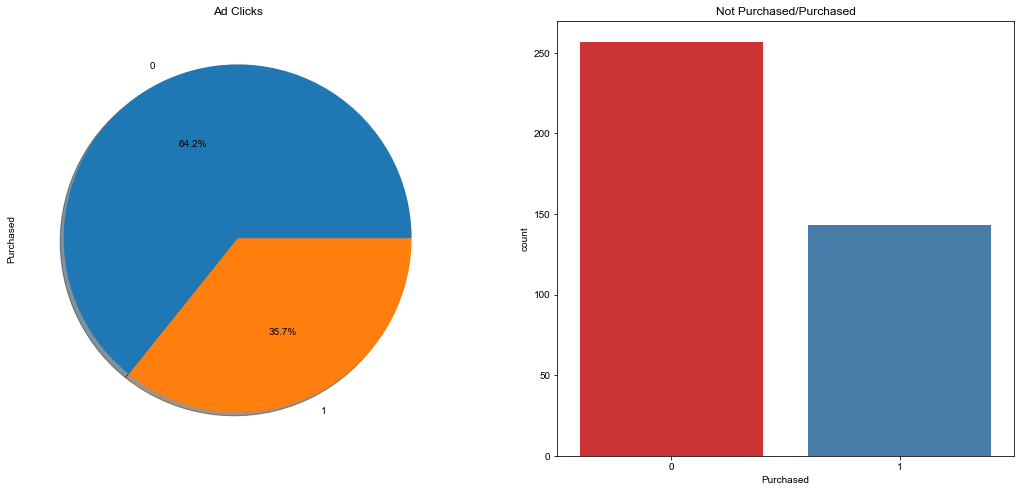

In [7]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = ad_clicks['Purchased'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Ad Clicks')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Purchased", data=ad_clicks, palette="Set1")
ax[1].set_title("Not Purchased/Purchased")
sns.set(style='whitegrid')
plt.show()

<h4>Distribution of Purchased by Gender - Purchased/Unpurchased

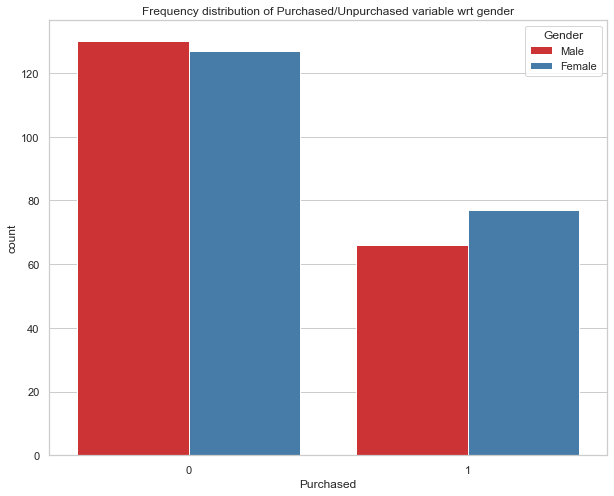

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Purchased", hue="Gender", data=ad_clicks, palette="Set1")
ax.set_title("Frequency distribution of Purchased/Unpurchased variable wrt gender")
plt.show()

Numerical Variables

In [9]:
numerical = [var for var in ad_clicks.columns if ad_clicks[var].dtype!='O']
print(numerical)

['Age', 'EstimatedSalary', 'Purchased']


In [10]:
ad_clicks['Age'].nunique()

43

<b>Age Histogram

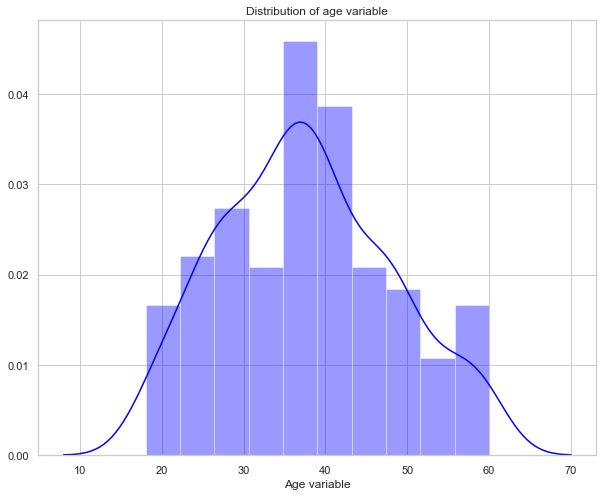

In [11]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
x = pd.Series(x, name="Age variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

<b>Age B&W

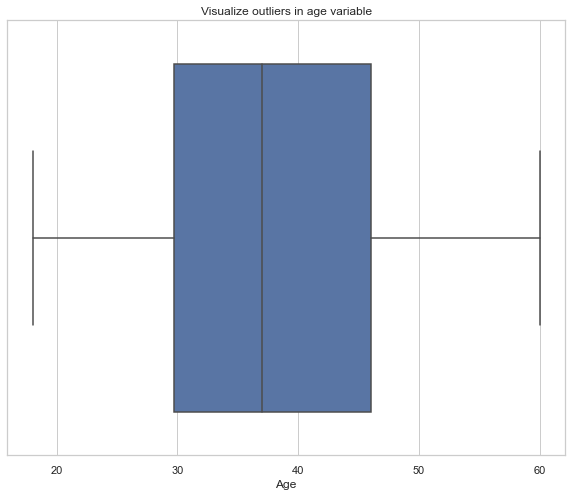

In [12]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

<b>Age and Purchased/Unpurchased B&W

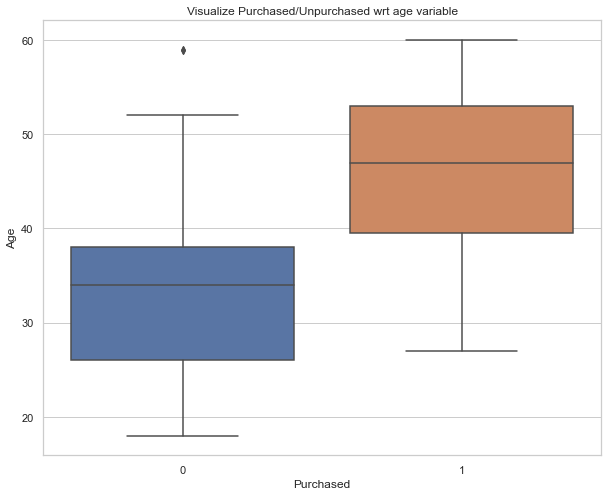

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt age variable")
plt.show()

<b>Age, Unpurchased by Gender, Purchased by Gender B&W

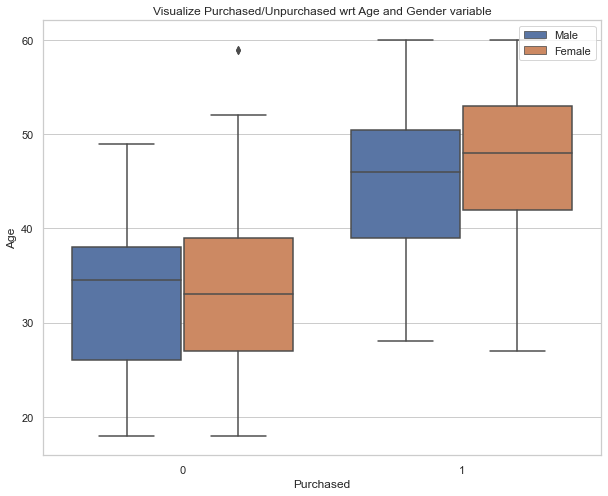

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Age and Gender variable")
ax.legend(loc='upper right')
plt.show()

<b>Age, Unpurchased/Purchased Male, Unpurchased/Purchased Female

<Figure size 576x432 with 0 Axes>

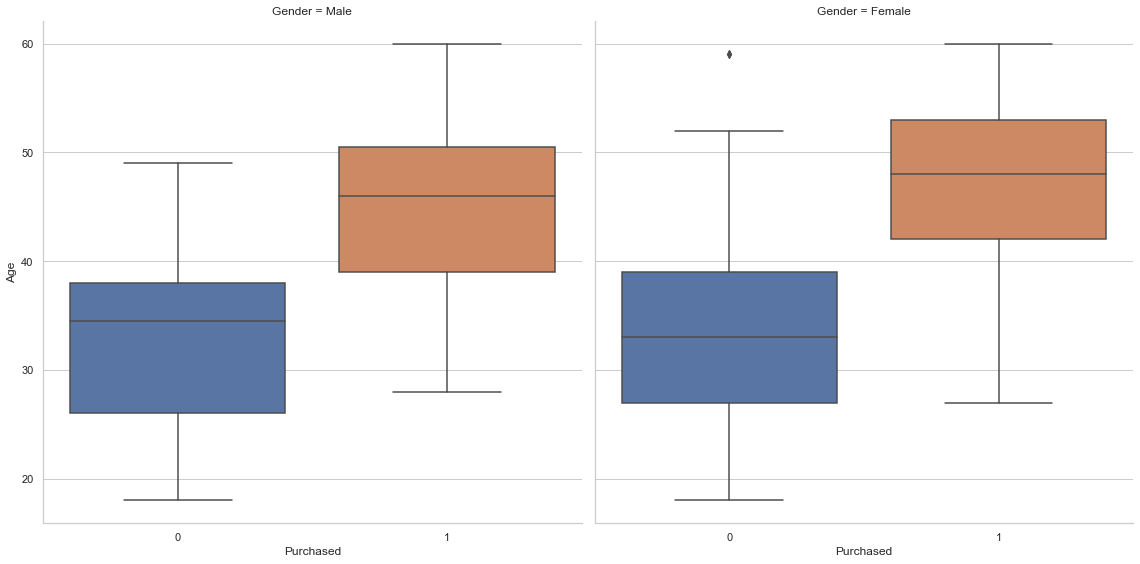

In [15]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="Age", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

<b>Salary Histogram

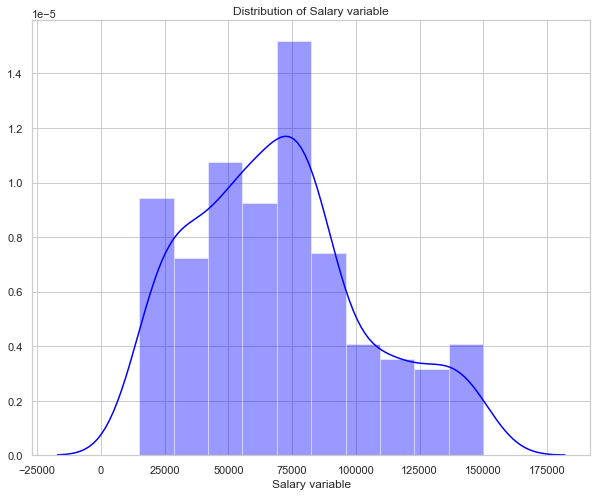

In [16]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
x = pd.Series(x, name="Salary variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of Salary variable")
plt.show()

<b>Salary B&W

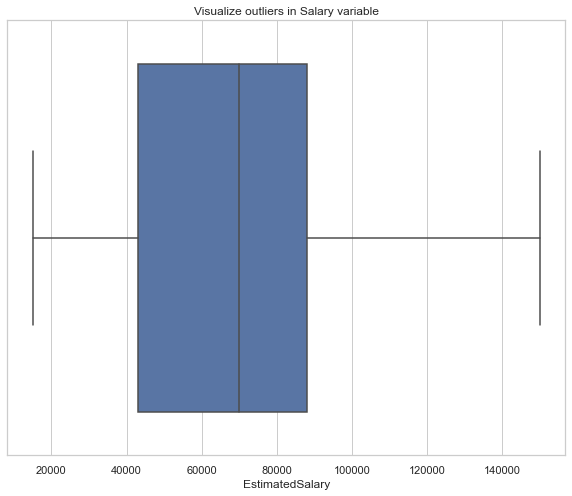

In [17]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Salary variable")
plt.show()

<b>Salary, Unpurchased/Purchased B&W

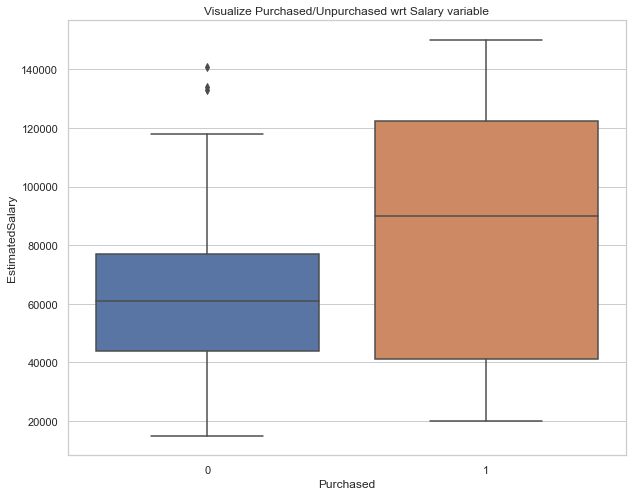

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary variable")
plt.show()

<b>Salary, Unpurchased by Gender, Purchased by Gender B&W

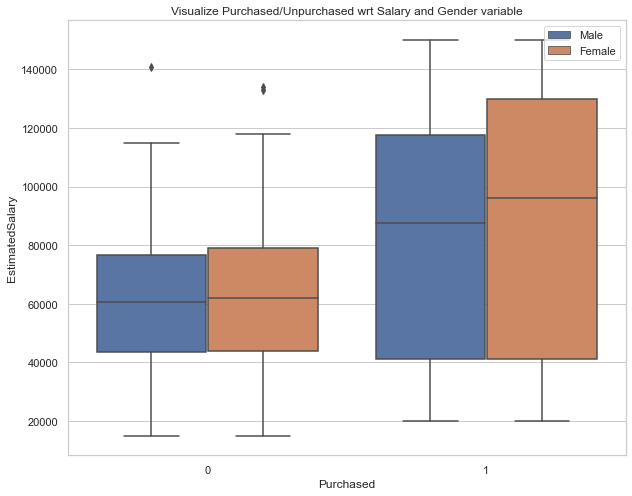

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary and Gender variable")
ax.legend(loc='upper right')
plt.show()

<b>Salary, Unpurchased/Purchased Male, Unpurchased/Purchased Female B&W

<Figure size 576x432 with 0 Axes>

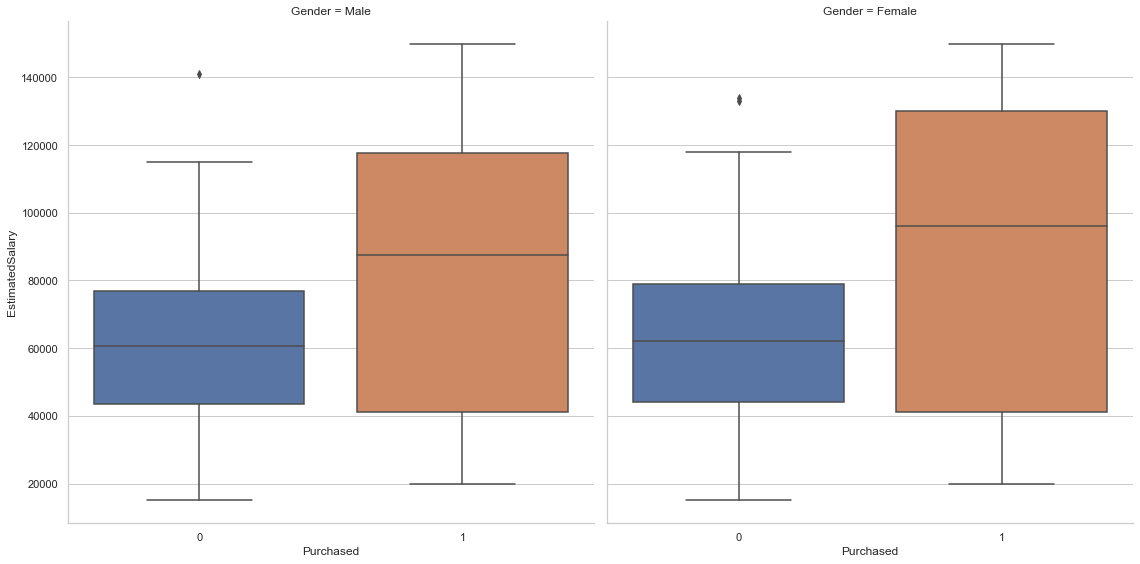

In [20]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

Target Age Distributions

In [21]:
min_value = ad_clicks['Age'].min()
max_value = ad_clicks['Age'].max()
print(min_value, max_value)
age_bins_ar2 = np.linspace(min_value,max_value,5)
print(age_bins_ar2)

18 60
[18.  28.5 39.  49.5 60. ]


<h4>Target Market Age Tier Distribution

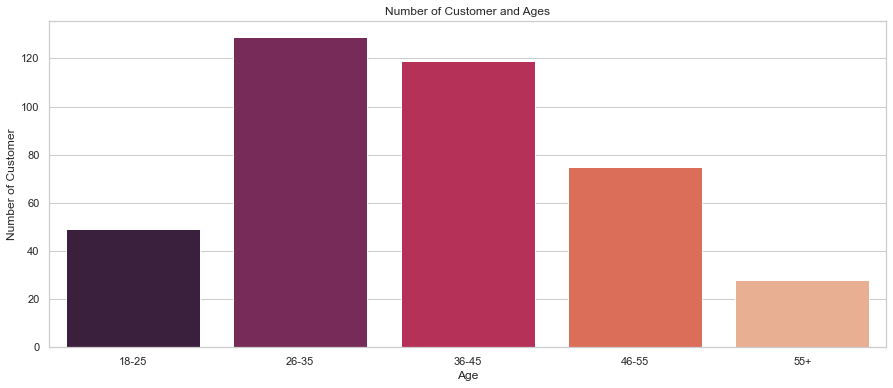

In [29]:
age18_25 = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18)]
age26_35 = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26)]
age36_45 = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36)]
age46_55 = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46)]
age55above = ad_clicks.loc[ad_clicks.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
y2= [(age18_25.values),(age26_35.values),(age36_45.values),(age46_55.values),(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [30]:
y_sum = sum(y)
y_array = np.asarray(y)
perc_list = y_array/y_sum
perc_val = perc_list*100
dict = {'Age Group': x, 'Total Count': y_array, 'Percentage of Users': perc_val}
age_df = pd.DataFrame(dict)
age_df.style.format({'Percentage of Users': '{0:.2f}%'.format,})

,Age Group,Total Count,Percentage of Users
0,18-25,49,12.25%
1,26-35,129,32.25%
2,36-45,119,29.75%
3,46-55,75,18.75%
4,55+,28,7.00%


<h4>Target Age Group, Gender Distribution 

In [31]:
age18_25f = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Female')]
age18_25fP = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Female')& (ad_clicks.Purchased == 1)]
age18_25fNP = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Female')& (ad_clicks.Purchased == 0)]
age18_25m = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Male')]
age18_25mP = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age18_25mNP = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

age26_35f = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Female')]
age26_35fP = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
age26_35fNP = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
age26_35m = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Male')]
age26_35mP = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age26_35mNP = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

age36_45f = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Female')]
age36_45fP = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
age36_45fNP = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
age36_45m = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Male')]
age36_45mP = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age36_45mNP = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

age46_55f = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Female')]
age46_55fP = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
age46_55fNP = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
age46_55m = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Male')]
age46_55mP = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age46_55mNP = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

age55abovef = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Female')]
age55abovefP = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
age55abovefNP = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
age55abovem = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Male')]
age55abovemP = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age55abovemNP = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]


agex =  ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
ageyf = [len(age18_25f.values),len(age26_35f.values),len(age36_45f.values),len(age46_55f.values),len(age55abovef.values)]
ageym = [len(age18_25m.values),len(age26_35m.values),len(age36_45m.values),len(age46_55m.values),len(age55abovem.values)]

agefP = [len(age18_25fP.values), len(age26_35fP.values), len(age36_45fP.values), len(age46_55fP.values), len(age55abovefP.values)]
agefNP = [len(age18_25fNP.values), len(age26_35fNP.values), len(age36_45fNP.values), len(age46_55fNP.values), len(age55abovefNP.values)]
agemP = [len(age18_25mP.values), len(age26_35mP.values), len(age36_45mP.values), len(age46_55mP.values), len(age55abovemP.values)]
agemNP = [len(age18_25mNP.values), len(age26_35mNP.values), len(age36_45mNP.values), len(age46_55mNP.values), len(age55abovemNP.values)]

dict2 = {'Age Group': agex, 'Female Count': ageyf, 'Male Count':ageym}
age_gender_df = pd.DataFrame(dict2)
age_gender_df 


,Age Group,Female Count,Male Count
0,18-25,22,27
1,26-35,65,64
2,36-45,56,63
3,46-55,45,30
4,55+,16,12


<h4>Nested Pie Distribution of Gender Purchased/Not Purchased by Age Tier

In [35]:
labels = agex
sizes = agey
ages_gender = agefP, agefNP, agemP, agemNP
arr = np.array(ages_gender)
transpose = arr.T
list_age = transpose.tolist()
flattened = [val for sublist in list_age for val in sublist] 

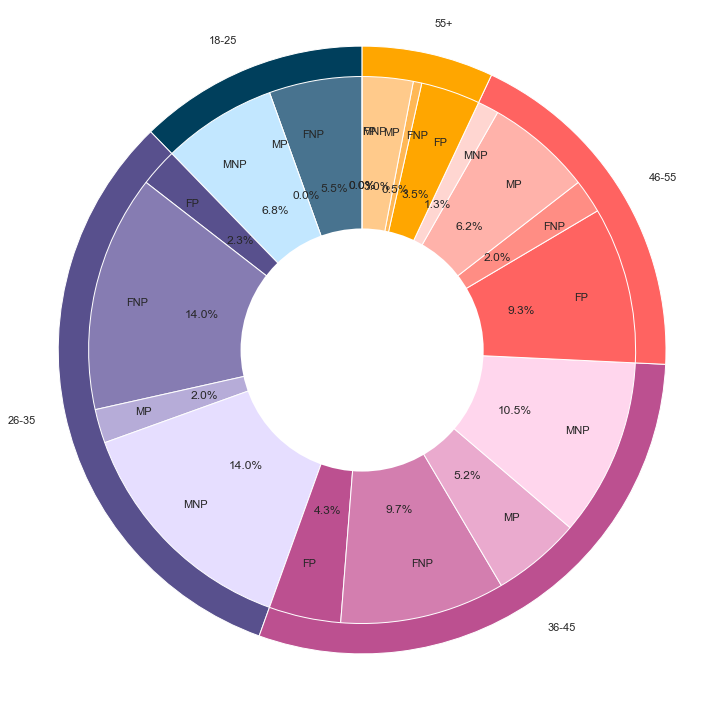

In [36]:
labels_inner = ['FP', 'FNP', 'MP', 'MNP', 'FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP']
sizes_inner = flattened
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
colors_inner = ['#003f5c', '#48738f', '#84abc6','#c2e7ff', 
                   '#58508d','#867cb2','#b6acd8','#e6deff',
                   '#bc5090', '#d37eaf', '#eaaace','#ffd6ed',
                    '#ff6361','#ff8d84','#ffb2aa','#ffd6d1',
                    '#ffa600','#ffb856', '#ffca8b','#fbddbe']
 
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True)
smaller = plt.pie(sizes_inner, labels=labels_inner,
                  colors=colors_inner, radius=.9,
                  startangle=90, labeldistance=0.8, autopct='%1.1f%%',)
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()

plt.show()

#Calculate Age Group - Gender Subarray ; Purchased/Unpurchased (repeat charts)

<h4>Target Market Tier Estimated Salary Distribution

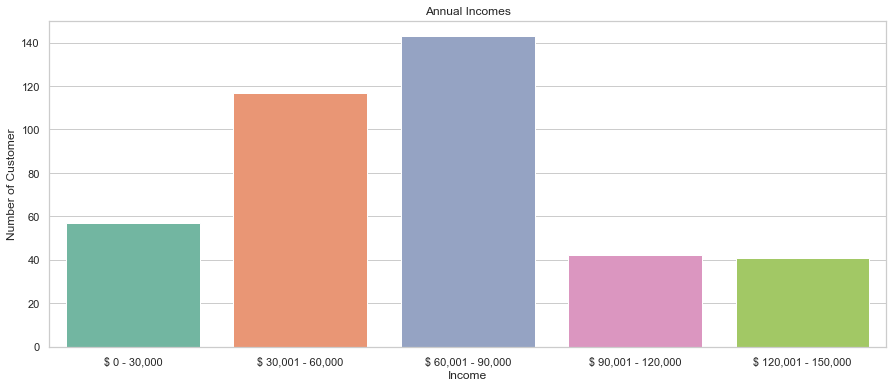

In [25]:
es0_30 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000)]
es31_60 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000)]
es61_90 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000)]
es91_120 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000)]
es121_150 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000)]

esx = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
esy = [len(es0_30.values), len(es31_60.values), len(es61_90.values), len(es91_120.values), len(es121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=esx, y=esy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

<h4>Target Market Tier Estimated Salary, Gender Distribution

In [26]:
es0_30f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Female')]
es0_30fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Female')  & (ad_clicks.Purchased == 1)]
es0_30fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es0_30m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Male')]
es0_30mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es0_30mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

es31_60f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Female')]
es31_60fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
es31_60fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es31_60m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Male')]
es31_60mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es31_60mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

es61_90f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Female')]
es61_90fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
es61_90fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es61_90m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Male')]
es61_90mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es61_90mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

es91_120f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Female')]
es91_120fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
es91_120fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es91_120m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Male')]
es91_120mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es91_120mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

es121_150f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Female')]
es121_150fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
es121_150fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es121_150m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Male')]
es121_150mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es121_150mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

esx = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
esy = [len(es0_30.values), len(es31_60.values), len(es61_90.values), len(es91_120.values), len(es121_150.values)]
esyf = [len(es0_30f.values), len(es31_60f.values), len(es61_90f.values), len(es91_120f.values), len(es121_150f.values)]
esym = [len(es0_30m.values), len(es31_60m.values), len(es61_90m.values), len(es91_120m.values), len(es121_150m.values)]
esyfP= [len(es0_30fP.values), len(es31_60fP.values), len(es61_90fP.values), len(es91_120fP.values), len(es121_150fP.values)]
esyfNP= [len(es0_30fNP.values), len(es31_60fNP.values), len(es61_90fNP.values), len(es91_120fNP.values), len(es121_150fNP.values)]
esymP = [len(es0_30mP.values), len(es31_60mP.values), len(es61_90mP.values), len(es91_120mP.values), len(es121_150mP.values)]
esymNP = [len(es0_30mNP.values), len(es31_60mNP.values), len(es61_90mNP.values), len(es91_120mNP.values), len(es121_150mNP.values)]



Calculations

In [27]:
esy_sum = sum(esy)
esy_array = np.asarray(esy)
print(esy_array)
esperc_list = esy_array/esy_sum
print(esperc_list)
esperc_val = esperc_list*100
print(esperc_val)

totalP =(np.add(esymP,esyfP))
totalmP = (np.sum(esymP))
totalfP = (np.sum(esyfP))
percP =((np.add(esymP,esyfP))/esy_array)*100

percmP = (np.divide(esymP,esym))*100 #%of Males Purchased of all Males in group (malePurchased/TotalMales in group)
percmPofTP = (np.divide(esymP,totalP))*100 #%ofMales Purchased of Total Purchases in Group
percfP = (np.divide(esyfP,esyf))*100
percfPofTP = (np.divide(esyfP,totalP))*100

percmPofTMP = (np.divide(esymP,totalmP))*100 #%of Purchases of all Male purchases
percfPofTFP = (np.divide(esyfP,totalfP))*100

MPofTP = (np.divide(esymP,np.sum(totalP)))#gender Purchases of all Purchases 
FPofTP = (np.divide(esyfP,np.sum(totalP)))
print(percP)
print(percmP)
print(percfP)
print(FPofTP)

[ 57 117 143  42  41]
[0.1425 0.2925 0.3575 0.105  0.1025]
[14.25 29.25 35.75 10.5  10.25]
[35.0877193  23.07692308 17.48251748 78.57142857 92.68292683]
[34.48275862 19.29824561 20.51282051 87.5        93.75      ]
[35.71428571 26.66666667 13.84615385 73.07692308 92.        ]
[0.06993007 0.11188811 0.06293706 0.13286713 0.16083916]


<h4>Dataframe for Target Market Tier Purchases - Estimated Salary, Gender Distribution

In [28]:
dict = {'Salary Group': esx, 'Total Count': esy_array, 'Percentage of Users': esperc_val, 'TotalP':totalP, '%PofTotalCount':percP, 
        'Male':esym, 'MalePurchased':esymP, 'MPofTotalPofGroup':percmPofTP, '%ofMalePofMGroup':percmP, '%MPofTotalMP':percmPofTMP,'MPofTotalP':MPofTP, 
        'Female':esyf, 'FemalePurchased':esyfP, 'FPofTotalPofGroup':percfPofTP, '%ofFemalePofFGroup':percfP,'%FPofTotalFP':percfPofTFP, 'FPofTotalP':FPofTP, 
         'MaleNotP':esymNP, 'FemaleNotP':esyfNP}
salary_df = pd.DataFrame(dict)

salary_df.style.format({'Percentage of Users': '{0:.2f}%'.format, '%PofTotalCount': '{0:.2f}%'.format,
'MPofTotalPofGroup': '{0:.2f}%'.format, '%ofMalePofMGroup': '{0:.2f}%'.format,'%MPofTotalMP': '{0:.2f}%'.format,
'MPofTotalP': '{0:.2f}%'.format,'FPofTotalPofGroup': '{0:.2f}%'.format, '%ofFemalePofFGroup': '{0:.2f}%'.format,
'%FPofTotalFP': '{0:.2f}%'.format,'FPofTotalP': '{0:.2f}%'.format,})


,Salary Group,Total Count,Percentage of Users,TotalP,%PofTotalCount,Male,MalePurchased,MPofTotalPofGroup,%ofMalePofMGroup,%MPofTotalMP,MPofTotalP,Female,FemalePurchased,FPofTotalPofGroup,%ofFemalePofFGroup,%FPofTotalFP,FPofTotalP,MaleNotP,FemaleNotP
0,"$ 0 - 30,000",57,14.25%,20,35.09%,29,10,50.00%,34.48%,15.15%,0.07%,28,10,50.00%,35.71%,12.99%,0.07%,19,18
1,"$ 30,001 - 60,000",117,29.25%,27,23.08%,57,11,40.74%,19.30%,16.67%,0.08%,60,16,59.26%,26.67%,20.78%,0.11%,46,44
2,"$ 60,001 - 90,000",143,35.75%,25,17.48%,78,16,64.00%,20.51%,24.24%,0.11%,65,9,36.00%,13.85%,11.69%,0.06%,62,56
3,"$ 90,001 - 120,000",42,10.50%,33,78.57%,16,14,42.42%,87.50%,21.21%,0.10%,26,19,57.58%,73.08%,24.68%,0.13%,2,7
4,"$ 120,001 - 150,000",41,10.25%,38,92.68%,16,15,39.47%,93.75%,22.73%,0.10%,25,23,60.53%,92.00%,29.87%,0.16%,1,2


<b>Salary Group</b> : 5 Salary Categories of Users <br>
<b>Total Count</b> : Total Count of Users in Each Salary Tier <br>
<b>Percentage of Users</b>: Percentage of Users /Total Users <br>
<b>TotalP</b> : Count of Purchased for Salary Tier <br>
<b>%PofTotalCount</b> : % Purchased for Category Tier out of all users in Category Tier <br>
<b>Male</b> : # of Male Users in Category Tier <br>
<b>MalePurchased</b> : # of Males Purchased in Category Tier <br>
<b>MPofTotalPofGroup</b> : % of Males Purchased of all Purchased in Category Tier <br>
<b>%ofMalePofMGroup</b> : % of Males Purchased of all Males in Category Tier <br>
<b>%MPofTotalMP</b> : % of Males Purchased in Category Tier of all Males Purchased <br>
<b>MPofTotalP</b> : % of Males Purchased in Category Tier of all Purchased <br>
<b>Female</b> : # of Female Users in Category Tier <br>
<b>FemalePurchased</b> :  # of Females Purchased in Category Tier <br>
<b>FPofTotalPofGroup</b> : % of Females Purchased of all Purchased in Category Tier <br>
<b>%ofFemalePofFGroup</b> : % of Females Purchased of all Females in Category Tier <br>
<b>%FPofTotalFP</b> : % of Females Purchased in Category Tier of all Females Purchased <br>
<b>FPofTotalP</b> : % of Females Purchased in Category Tier of all Purchased <br>
<b>MaleNotP</b> : # of Males Not Purchased in Category Tier <br>
<b>FemaleNotP</b> : # of Female Not Purchased in Category Tier <br> 

<h4>Nested Pie Distribution of Gender Purchased/Not Purchased by Salary Tier

In [29]:
sizes_gender = esyfP, esyfNP, esymP, esymNP
labels = esx
sizes = esy
arr = np.array(sizes_gender)
transpose = arr.T
list_gender = transpose.tolist()
flattened = [val for sublist in list_gender for val in sublist] 

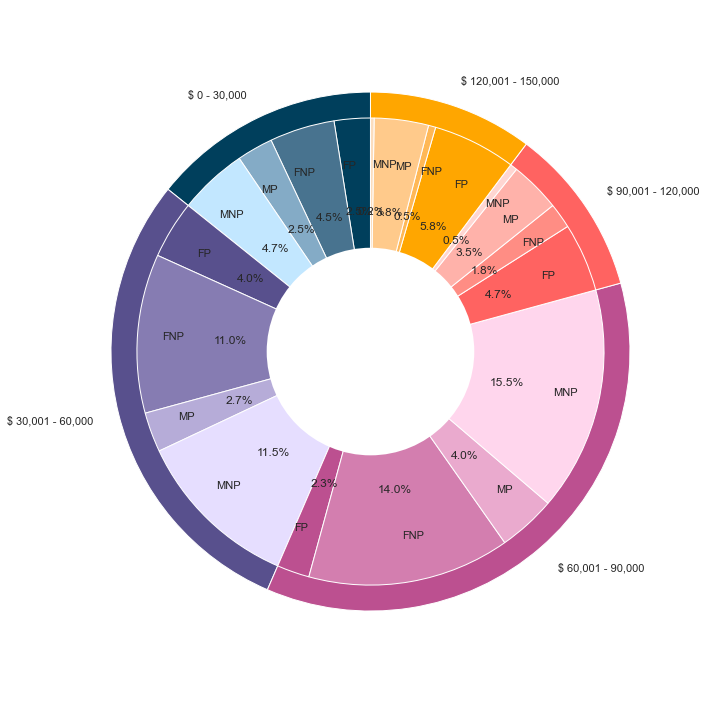

In [30]:
labels_inner = ['FP', 'FNP', 'MP', 'MNP', 'FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP']
sizes_inner = flattened
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
colors_inner = ['#003f5c', '#48738f', '#84abc6','#c2e7ff', 
                   '#58508d','#867cb2','#b6acd8','#e6deff',
                   '#bc5090', '#d37eaf', '#eaaace','#ffd6ed',
                    '#ff6361','#ff8d84','#ffb2aa','#ffd6d1',
                    '#ffa600','#ffb856', '#ffca8b','#fbddbe']
 
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True)
smaller = plt.pie(sizes_inner, labels=labels_inner,
                  colors=colors_inner, radius=.9,
                  startangle=90, labeldistance=0.8, autopct='%1.1f%%',)
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()

plt.show()

Calculate Salary Group - Gender Subarray ; Purchased/Unpurchased 

Ex: representative percentage of purchased if man aged 41 with salary of 57k

In [31]:
#predict percentage of purchased if man aged 41 with salary of 57k

case_selection = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Male') & (ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000)]
case_P = case_selection.loc[case_selection.Purchased ==1]
case_NP = case_selection.loc[case_selection.Purchased ==0]
case_P


,Gender,Age,EstimatedSalary,Purchased
282,Male,37,70000,1
296,Male,42,73000,1
303,Male,37,79000,1
358,Male,40,71000,1
378,Male,41,87000,1


Groupby Gender, Purchased

In [32]:
multi = ad_clicks.groupby(['Purchased', 'Gender']).agg({'Age': ['count'], 'EstimatedSalary':['mean'] })
multi_fill = multi.fillna(0)
multi_fill

Age EstimatedSalary
                 count            mean
Purchased Gender                      
0         Female   127    61480.314961
          Male     130    59630.769231
1         Female    77    88714.285714
          Male      66    83424.242424

<h4>Age v Salary Scatter, 0:Unpurchased, 1:Purchased

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

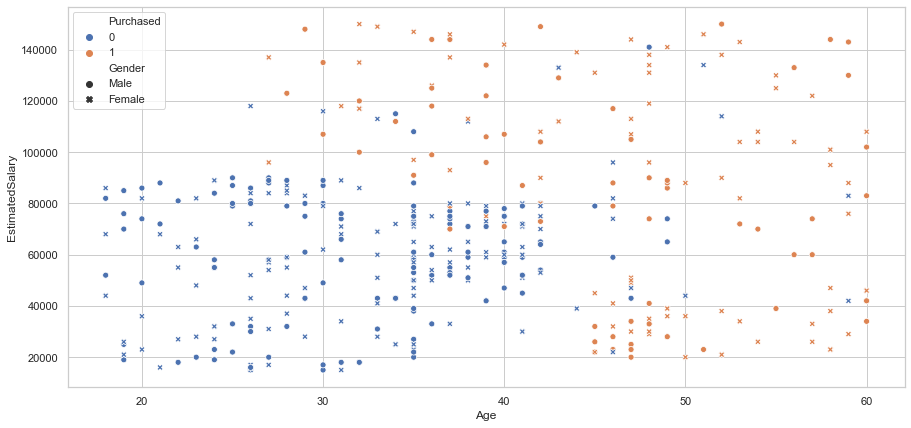

In [33]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=ad_clicks,x='Age',y='EstimatedSalary',hue='Purchased',style='Gender')

Descriptive Analysis

In [34]:
ad_clicks.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [35]:
ad_clicks2 = ad_clicks
ad_clicks2['Gender'] = ad_clicks2['Gender'].map({"Male":0, "Female":1})
ad_clicks2.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [36]:
ad_clicks2.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.5100,0.500526,0.0,0.00,1.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


<h4>K-Means Optimal Clusters - WCSS

<h5>Elbow K-Means 

In [37]:
ad_clicks

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


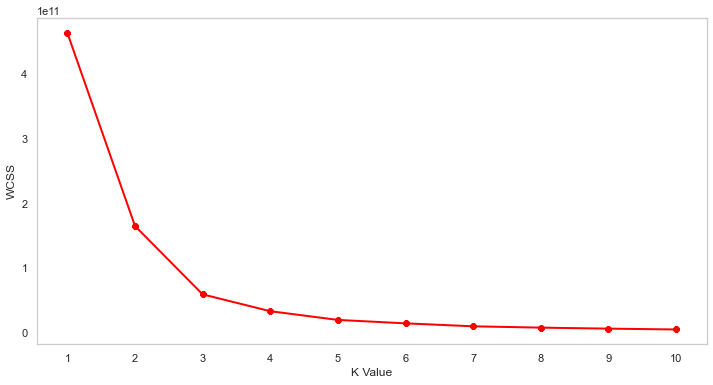

In [38]:
from sklearn.cluster import KMeans
X2=ad_clicks[["Age","EstimatedSalary","Gender"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(ad_clicks.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

k-value determined to be 3 using the elbow method

K-Means Clustering POC

In [39]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(ad_clicks.iloc[:,1:]) #fit and assign
ad_clicks["label"] = clusters #labels to column
ad_clicks.head()

,Gender,Age,EstimatedSalary,Purchased,label
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,1
3,Female,27,57000,0,2
4,Male,19,76000,0,2


<h5>3-D tri-axis K-Means Cluster Distribution

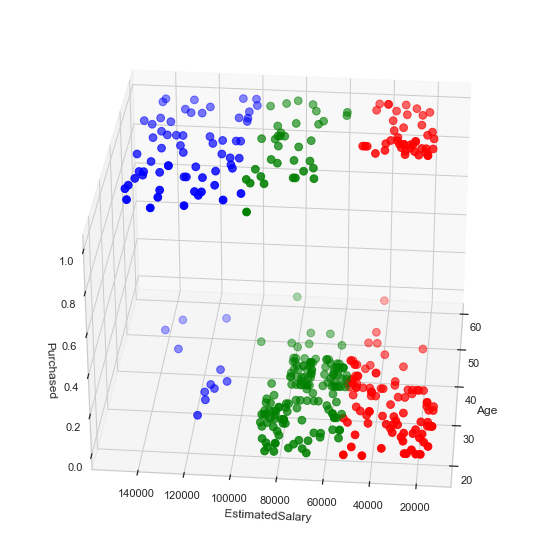

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ad_clicks.Age[ad_clicks.label == 0], ad_clicks["EstimatedSalary"][ad_clicks.label == 0], ad_clicks["Purchased"][ad_clicks.label == 0], c='blue', s=60)
ax.scatter(ad_clicks.Age[ad_clicks.label == 1], ad_clicks["EstimatedSalary"][ad_clicks.label == 1], ad_clicks["Purchased"][ad_clicks.label == 1], c='red', s=60)
ax.scatter(ad_clicks.Age[ad_clicks.label == 2], ad_clicks["EstimatedSalary"][ad_clicks.label == 2], ad_clicks["Purchased"][ad_clicks.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
ax.set_zlabel('Purchased')
plt.show()

Age View

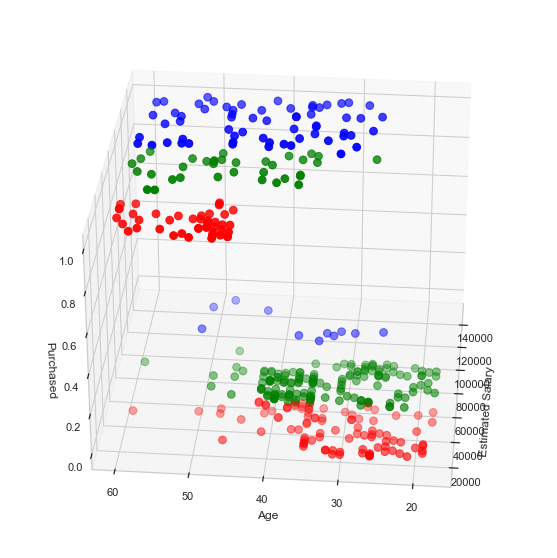

In [41]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ad_clicks.EstimatedSalary[ad_clicks.label == 0], ad_clicks["Age"][ad_clicks.label == 0], ad_clicks["Purchased"][ad_clicks.label == 0], c='blue', s=60)
ax.scatter(ad_clicks.EstimatedSalary[ad_clicks.label == 1], ad_clicks["Age"][ad_clicks.label == 1], ad_clicks["Purchased"][ad_clicks.label == 1], c='red', s=60)
ax.scatter(ad_clicks.EstimatedSalary[ad_clicks.label == 2], ad_clicks["Age"][ad_clicks.label == 2], ad_clicks["Purchased"][ad_clicks.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Estimated Salary")
plt.ylabel("Age")
ax.set_zlabel('Purchased')
plt.show()

<h5>Cluster Estimated Salary, Age Scatter

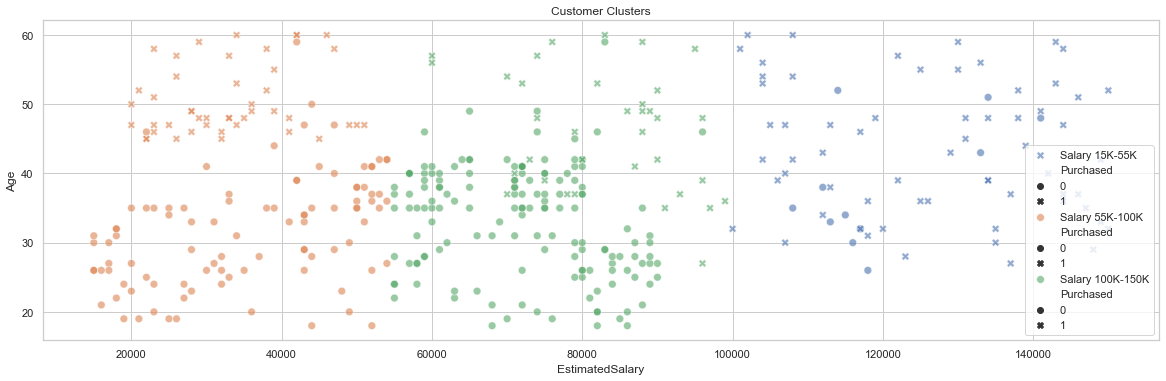

In [42]:
# Plot distributions
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);
sns.scatterplot(ad_clicks[ad_clicks.label == 0].loc[:,'EstimatedSalary'], ad_clicks[ad_clicks.label == 0].loc[:,'Age'],style=ad_clicks['Purchased'], s= 60, cmap='rainbow', label = 'Salary 15K-55K', alpha=0.6)
sns.scatterplot(ad_clicks[ad_clicks.label == 1].loc[:,'EstimatedSalary'], ad_clicks[ad_clicks.label  == 1].loc[:,'Age'],style=ad_clicks['Purchased'], s= 60, cmap='rainbow', label = 'Salary 55K-100K', alpha=0.6)
sns.scatterplot(ad_clicks[ad_clicks.label == 2].loc[:,'EstimatedSalary'], ad_clicks[ad_clicks.label  == 2].loc[:,'Age'],style=ad_clicks['Purchased'], s= 60, cmap='rainbow', label = 'Salary 100K-150K', alpha=0.6)
#plt.xticks(np.arange(0, 10, 1)) 
#plt.yticks(np.arange(0, 100, 10))
axes = plt.gca()
#axes.set_xlim(0, 500)
#axes.set_ylim(0, 10000)
plt.title('Customer Clusters')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.legend()



Determining Clusters & Sub-Clusters from Model<br>
<p>Determined 3 optimal clusters of Salary Range 

<h4>Determing Purchasing Distribution of Clusters

<h5>Cluster 1

<Figure size 576x432 with 0 Axes>

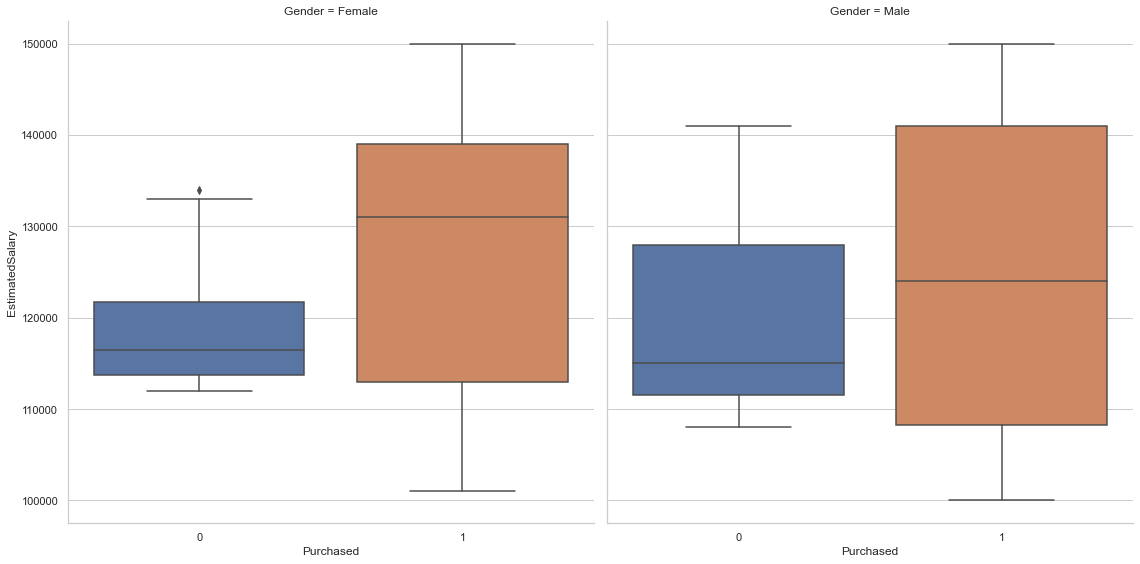

In [43]:
#"Gender/Purchase Analysis for Target Salary Range 15K-55K"
cluster_1 = ad_clicks.loc[ad_clicks['label'] == 0]

plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=cluster_1, kind="box", height=8, aspect=1)
plt.show()

Cluster 1 Pairwise Distributions Purchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>]],
      dtype=object)

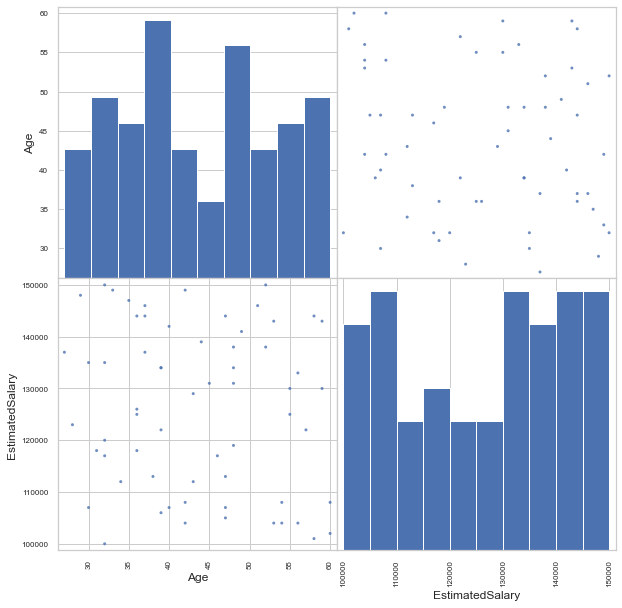

In [44]:
from pandas.plotting import scatter_matrix

cluster_1_p = cluster_1.loc[cluster_1["Purchased"] == 1]

sm1p = scatter_matrix(cluster_1_p[['Age', 'EstimatedSalary']],
    alpha=0.8, figsize=(10,10))
sm1p

Cluster 1 Pairwise Distributions Not Purchased

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>]],
      dtype=object)

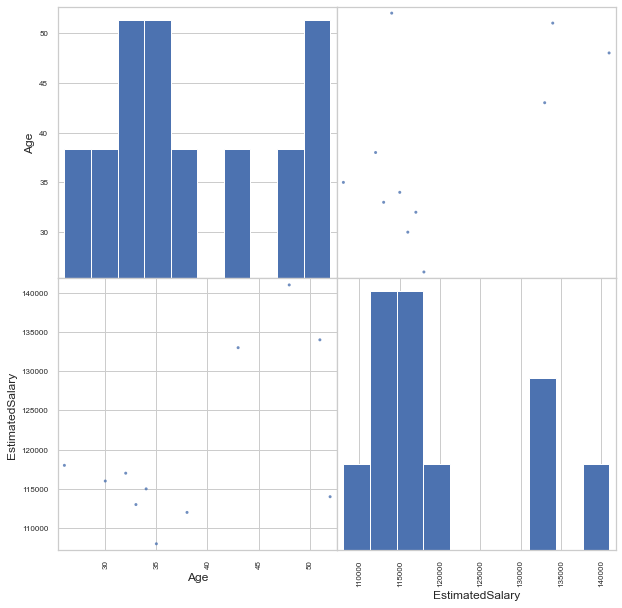

In [45]:
cluster_1_np = cluster_1.loc[cluster_1["Purchased"] == 0]

sm1np = scatter_matrix(cluster_1_np[['Age','EstimatedSalary']],
    alpha=0.8, figsize=(10,10))
sm1np

<h5>Cluster 2

<Figure size 576x432 with 0 Axes>

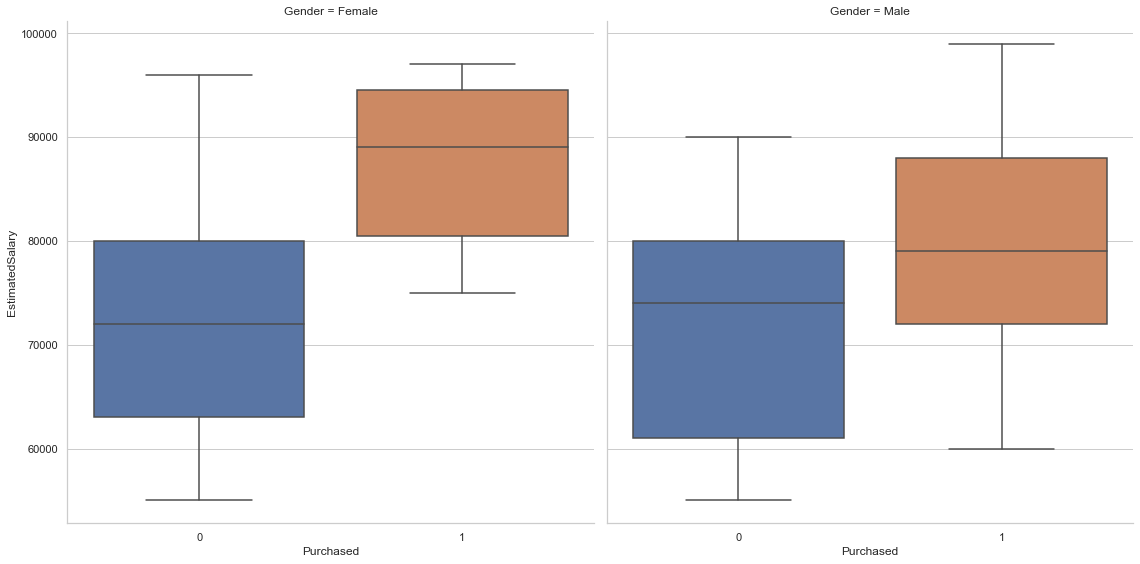

In [46]:
#"Gender/Purchase Analysis for Target Salary Range 55K-100K"
cluster_2 = ad_clicks.loc[ad_clicks['label'] == 2]

plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=cluster_2, kind="box", height=8, aspect=1)
plt.show()

Cluster 2 Pairwise Distributions Purchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>]],
      dtype=object)

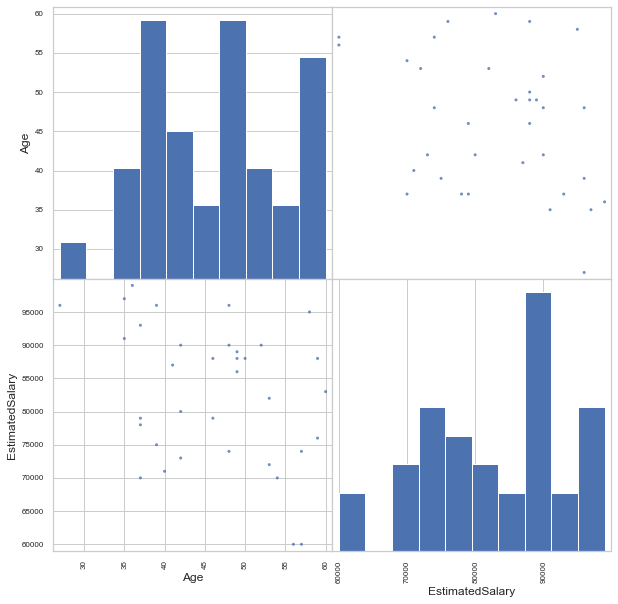

In [47]:
cluster_2_p = cluster_2.loc[cluster_2["Purchased"] == 1]

sm3p = scatter_matrix(cluster_2_p[['Age', 'EstimatedSalary']],
    alpha=0.8, figsize=(10,10))
sm3p

Cluster 2 Pairwise Distributions Not Purchased

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>]],
      dtype=object)

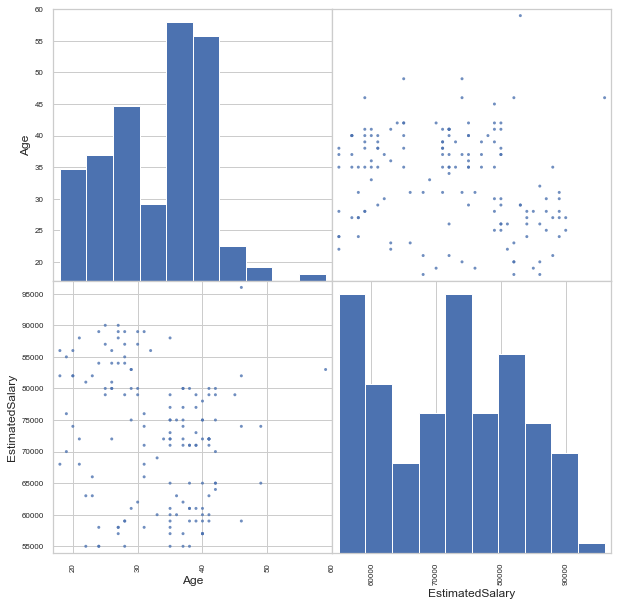

In [48]:
cluster_2_np = cluster_2.loc[cluster_2["Purchased"] == 0]

sm3np = scatter_matrix(cluster_2_np[['Age','EstimatedSalary']],
    alpha=0.8, figsize=(10,10))
sm3np

<h5>Cluster 3

<Figure size 576x432 with 0 Axes>

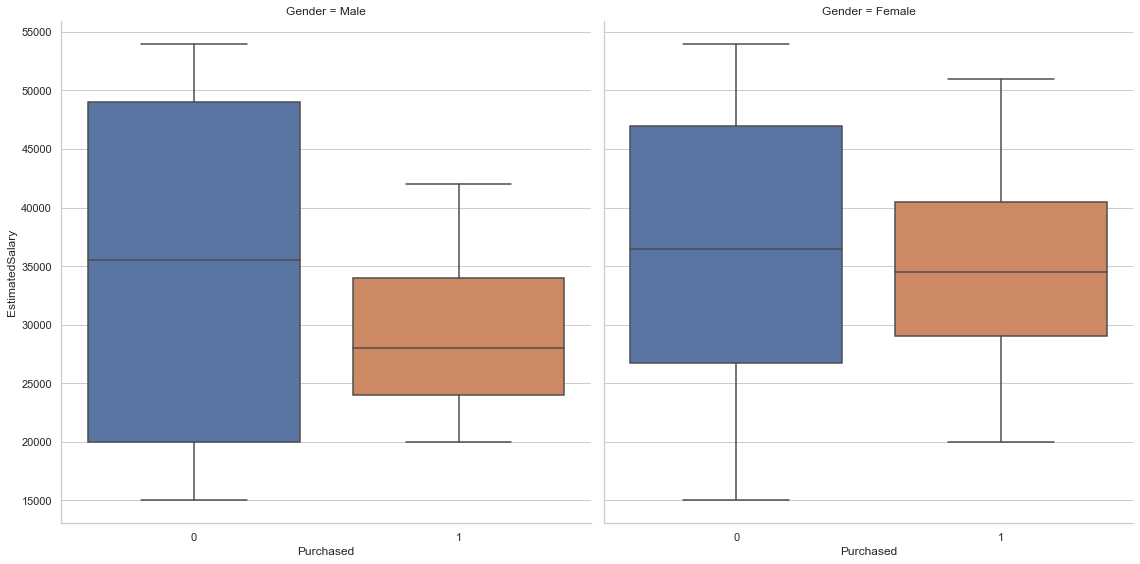

In [49]:
#"Gender/Purchase Analysis for Target Salary Range 100K-150K"
cluster_3 = ad_clicks.loc[ad_clicks['label'] == 1]

plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=cluster_3, kind="box", height=8, aspect=1)
plt.show()

Cluster 3 Pairwise Distributions Purchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>]],
      dtype=object)

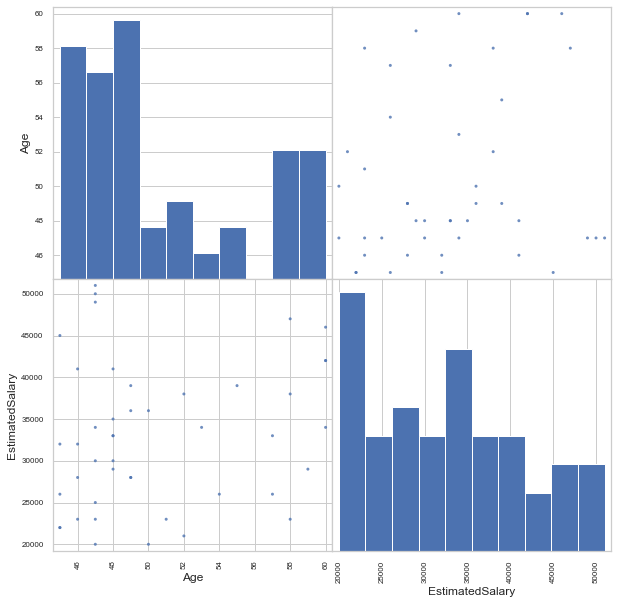

In [50]:
cluster_3_p = cluster_3.loc[cluster_3["Purchased"] == 1]

sm2p = scatter_matrix(cluster_3_p[['Age','EstimatedSalary']],
    alpha=0.8, figsize=(10,10))
sm2p

Cluster 3 Pairwise Distributions Not Purchased

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='EstimatedSalary'>]],
      dtype=object)

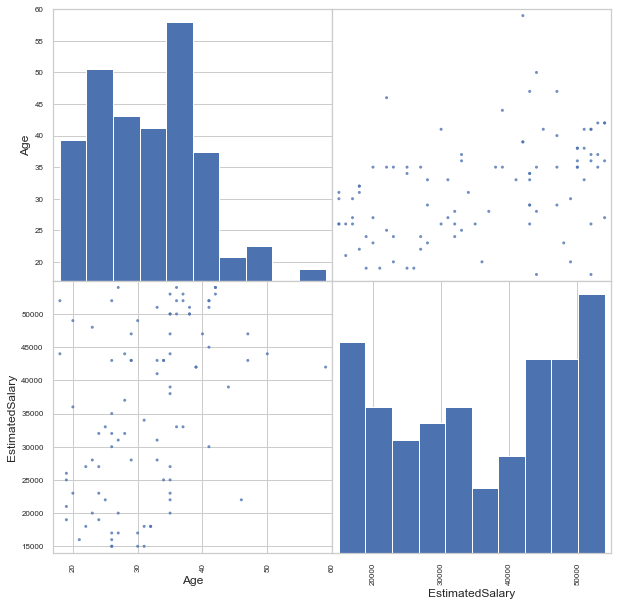

In [51]:
cluster_3_np = cluster_3.loc[cluster_3["Purchased"] == 0]

sm2np = scatter_matrix(cluster_3_np[['Age','EstimatedSalary']],
    alpha=0.8, figsize=(10,10))
sm2np

In [63]:
cluster_1.iloc[:,1:4] #kmeans cluster range solution 

,Age,EstimatedSalary,Purchased
7,32,150000,1
31,27,137000,1
42,35,108000,0
48,30,135000,1
59,32,117000,0
...,...,...,...
350,38,113000,1
360,43,129000,1
364,42,104000,1
373,59,130000,1


<b>K-means Tier Range Cluster Invariants - Cluster 1

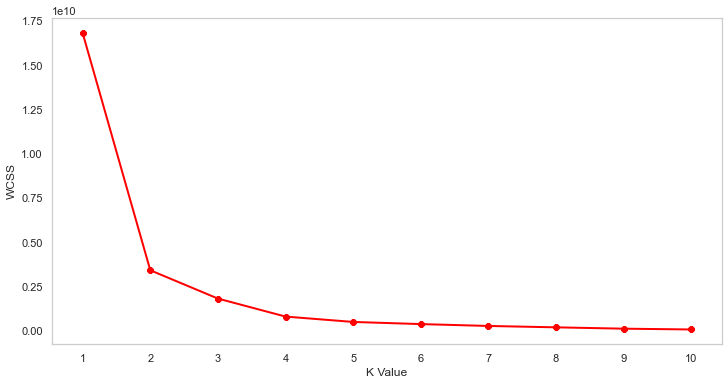

In [64]:
from sklearn.cluster import KMeans
X2=cluster_1[["Age","EstimatedSalary","Gender"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cluster_1.iloc[:,1:4])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [65]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(cluster_1.iloc[:,1:4]) #fit and assign
cluster_1["label_2"] = clusters #labels to column

<ipython-input-65-76922c116f7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1["label_2"] = clusters #labels to column


In [59]:
cluster_1P = cluster_1[cluster_1.Purchased==1]
cluster_1NP = cluster_1[cluster_1.Purchased==0]

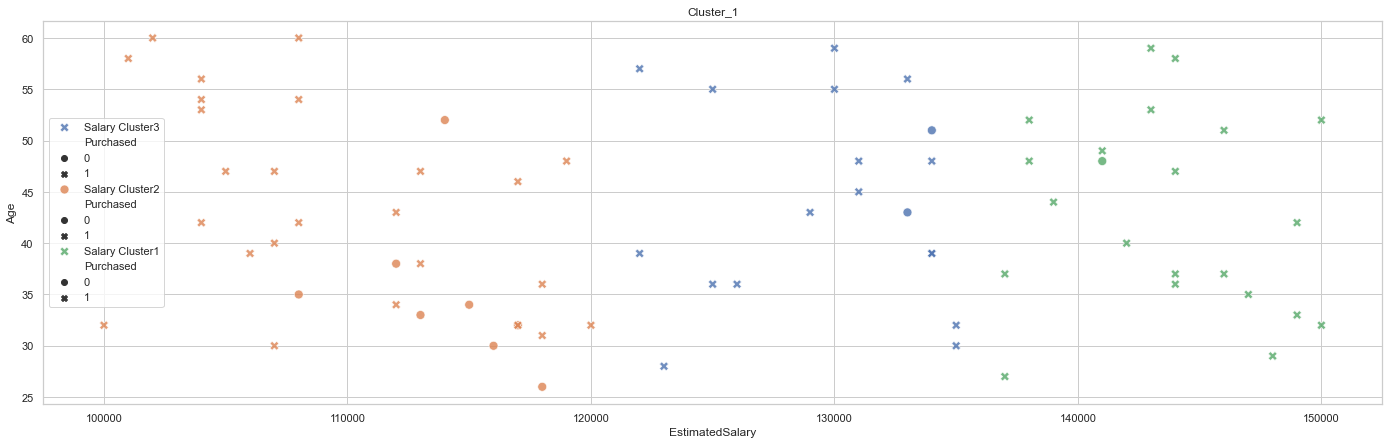

In [67]:
# Plot distributions
plt.figure(figsize=(24,24))
plt.subplot(3, 1, 1);
sns.scatterplot(cluster_1[cluster_1.label_2 == 0].loc[:,'EstimatedSalary'], cluster_1[cluster_1.label_2  == 0].loc[:,'Age'],style=cluster_1['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster1', alpha=0.8)
sns.scatterplot(cluster_1[cluster_1.label_2 == 1].loc[:,'EstimatedSalary'], cluster_1[cluster_1.label_2 == 1].loc[:,'Age'],style=cluster_1['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster2', alpha=0.8)
sns.scatterplot(cluster_1[cluster_1.label_2 == 2].loc[:,'EstimatedSalary'], cluster_1[cluster_1.label_2 == 2].loc[:,'Age'],style=cluster_1['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster3', alpha=0.8)
#plt.xticks(np.arange(0, 10, 1)) 
#plt.yticks(np.arange(0, 100, 5000))
axes = plt.gca()
#axes.set_xlim(0, 500)
#axes.set_ylim(0, 10000)
plt.title('Cluster_1')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.legend()

<b>K-means Tier Range Cluster Invariants - Cluster 2

In [69]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(cluster_2.iloc[:,1:4]) #fit and assign
cluster_2["label_2"] = clusters #labels to column

<ipython-input-69-4f92d8ad8a03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2["label_2"] = clusters #labels to column


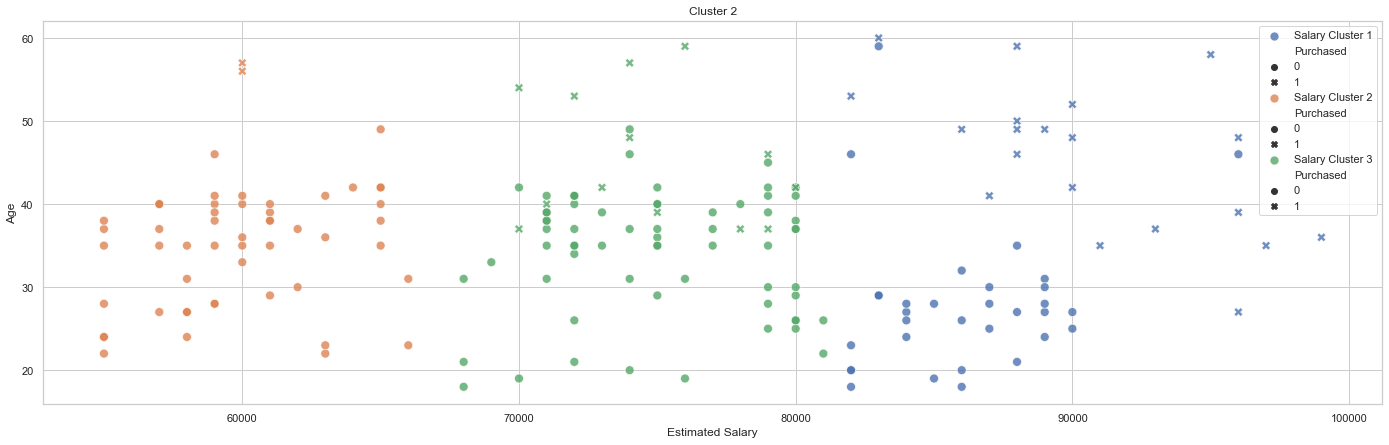

In [70]:
# Plot distributions
plt.figure(figsize=(24,24))
plt.subplot(3, 1, 1);
sns.scatterplot(cluster_2[cluster_2.label_2 == 0].loc[:,'EstimatedSalary'], cluster_2[cluster_2.label_2 == 0].loc[:,'Age'],style=cluster_2['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 1', alpha=0.8)
sns.scatterplot(cluster_2[cluster_2.label_2 == 1].loc[:,'EstimatedSalary'], cluster_2[cluster_2.label_2  == 1].loc[:,'Age'],style=cluster_2['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 2', alpha=0.8)
sns.scatterplot(cluster_2[cluster_2.label_2 == 2].loc[:,'EstimatedSalary'], cluster_2[cluster_2.label_2  == 2].loc[:,'Age'],style=cluster_2['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 3', alpha=0.8)
#plt.xticks(np.arange(0, 10, 1)) 
#plt.yticks(np.arange(0, 100, 15))
axes = plt.gca()
#axes.set_xlim(0, 500)
#axes.set_ylim(0, 10000)
plt.title('Cluster 2')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.legend()

<b>K-means Tier Range Cluster Invariants - Cluster 3

In [71]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(cluster_3.iloc[:,1:4]) #fit and assign
cluster_3["label_2"] = clusters #labels to column

<ipython-input-71-9fc6ad8d7838>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3["label_2"] = clusters #labels to column


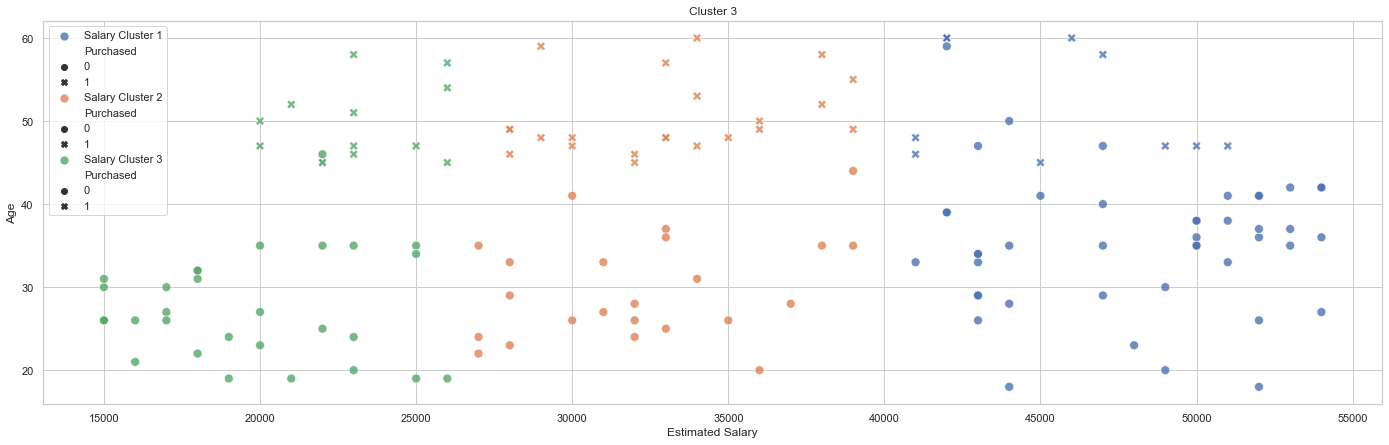

In [72]:
# Plot distributions
plt.figure(figsize=(24,24))
plt.subplot(3, 1, 1);
sns.scatterplot(cluster_3[cluster_3.label_2 == 0].loc[:,'EstimatedSalary'], cluster_3[cluster_3.label_2 == 0].loc[:,'Age'],style=cluster_3['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 1', alpha=0.8)
sns.scatterplot(cluster_3[cluster_3.label_2 == 1].loc[:,'EstimatedSalary'], cluster_3[cluster_3.label_2  == 1].loc[:,'Age'],style=cluster_3['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 2', alpha=0.8)
sns.scatterplot(cluster_3[cluster_3.label_2 == 2].loc[:,'EstimatedSalary'], cluster_3[cluster_3.label_2  == 2].loc[:,'Age'],style=cluster_3['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 3', alpha=0.8)
#plt.xticks(np.arange(0, 10, 1)) 
#plt.xticks(np.arange(0, 10, 1)) 
#plt.yticks(np.arange(55000, 100000, 5000))
axes = plt.gca()
#axes.set_xlim(0, 500)
#axes.set_ylim(0, 10000)
plt.title('Cluster 3')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.legend()